# Regressie

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate


# Wat wil dit script bereiken?

Op basis van de dataset over de Iris bloemen moet door middel van regressie een voorspelling van een datapunt worden gemaakt.
Uiteindelijk moet de lengte van een petal worden voorspelt.

Onderzoeksvraag: Kan de petal length worden voorspeld door middel van regressie?

# Data verzamelen

In [4]:
# Load the data
data = pd.read_csv('regressie-fish.csv')

# Species omzetten naar 1-3
data['Species'] = data['Species'].replace('Bream', 1)
data['Species'] = data['Species'].replace('Roach', 2)
data['Species'] = data['Species'].replace('Whitefish', 3)
data['Species'] = data['Species'].replace('Parkki', 4)
data['Species'] = data['Species'].replace('Perch', 5)
data['Species'] = data['Species'].replace('Pike', 6)
data['Species'] = data['Species'].replace('Smelt', 7)

display(data.head())

/tmp/ipykernel_21767/4225677199.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Species'] = data['Species'].replace('Smelt', 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,430.0,26.5,29.0,34.0,12.4440,5.1340


# Data visualisatie

Species      3.880503
Weight     398.326415
Length1     26.247170
Length2     28.415723
Length3     31.227044
Height       8.970994
Width        4.417486
dtype: float64
     Species  Weight  Length1  Length2  Length3   Height   Width
29         1  1000.0     33.5     37.0     42.6  18.9570  6.6030
30         1   920.0     35.0     38.5     44.1  18.0369  6.3063
31         1   955.0     35.0     38.5     44.0  18.0840  6.2920
32         1   925.0     36.2     39.5     45.3  18.7542  6.7497
33         1   975.0     37.4     41.0     45.9  18.6354  6.7473
34         1   950.0     38.0     41.0     46.5  17.6235  6.3705
111        5   840.0     32.5     35.0     37.3  11.4884  7.7957
126        5  1000.0     40.2     43.5     46.0  12.6040  8.1420
140        6   950.0     48.3     51.7     55.1   8.9262  6.1712
141        6  1250.0     52.0     56.0     59.7  10.6863  6.9849
142        6  1600.0     56.0     60.0     64.0   9.6000  6.1440
143        6  1550.0     56.0     60.0     64.0   9

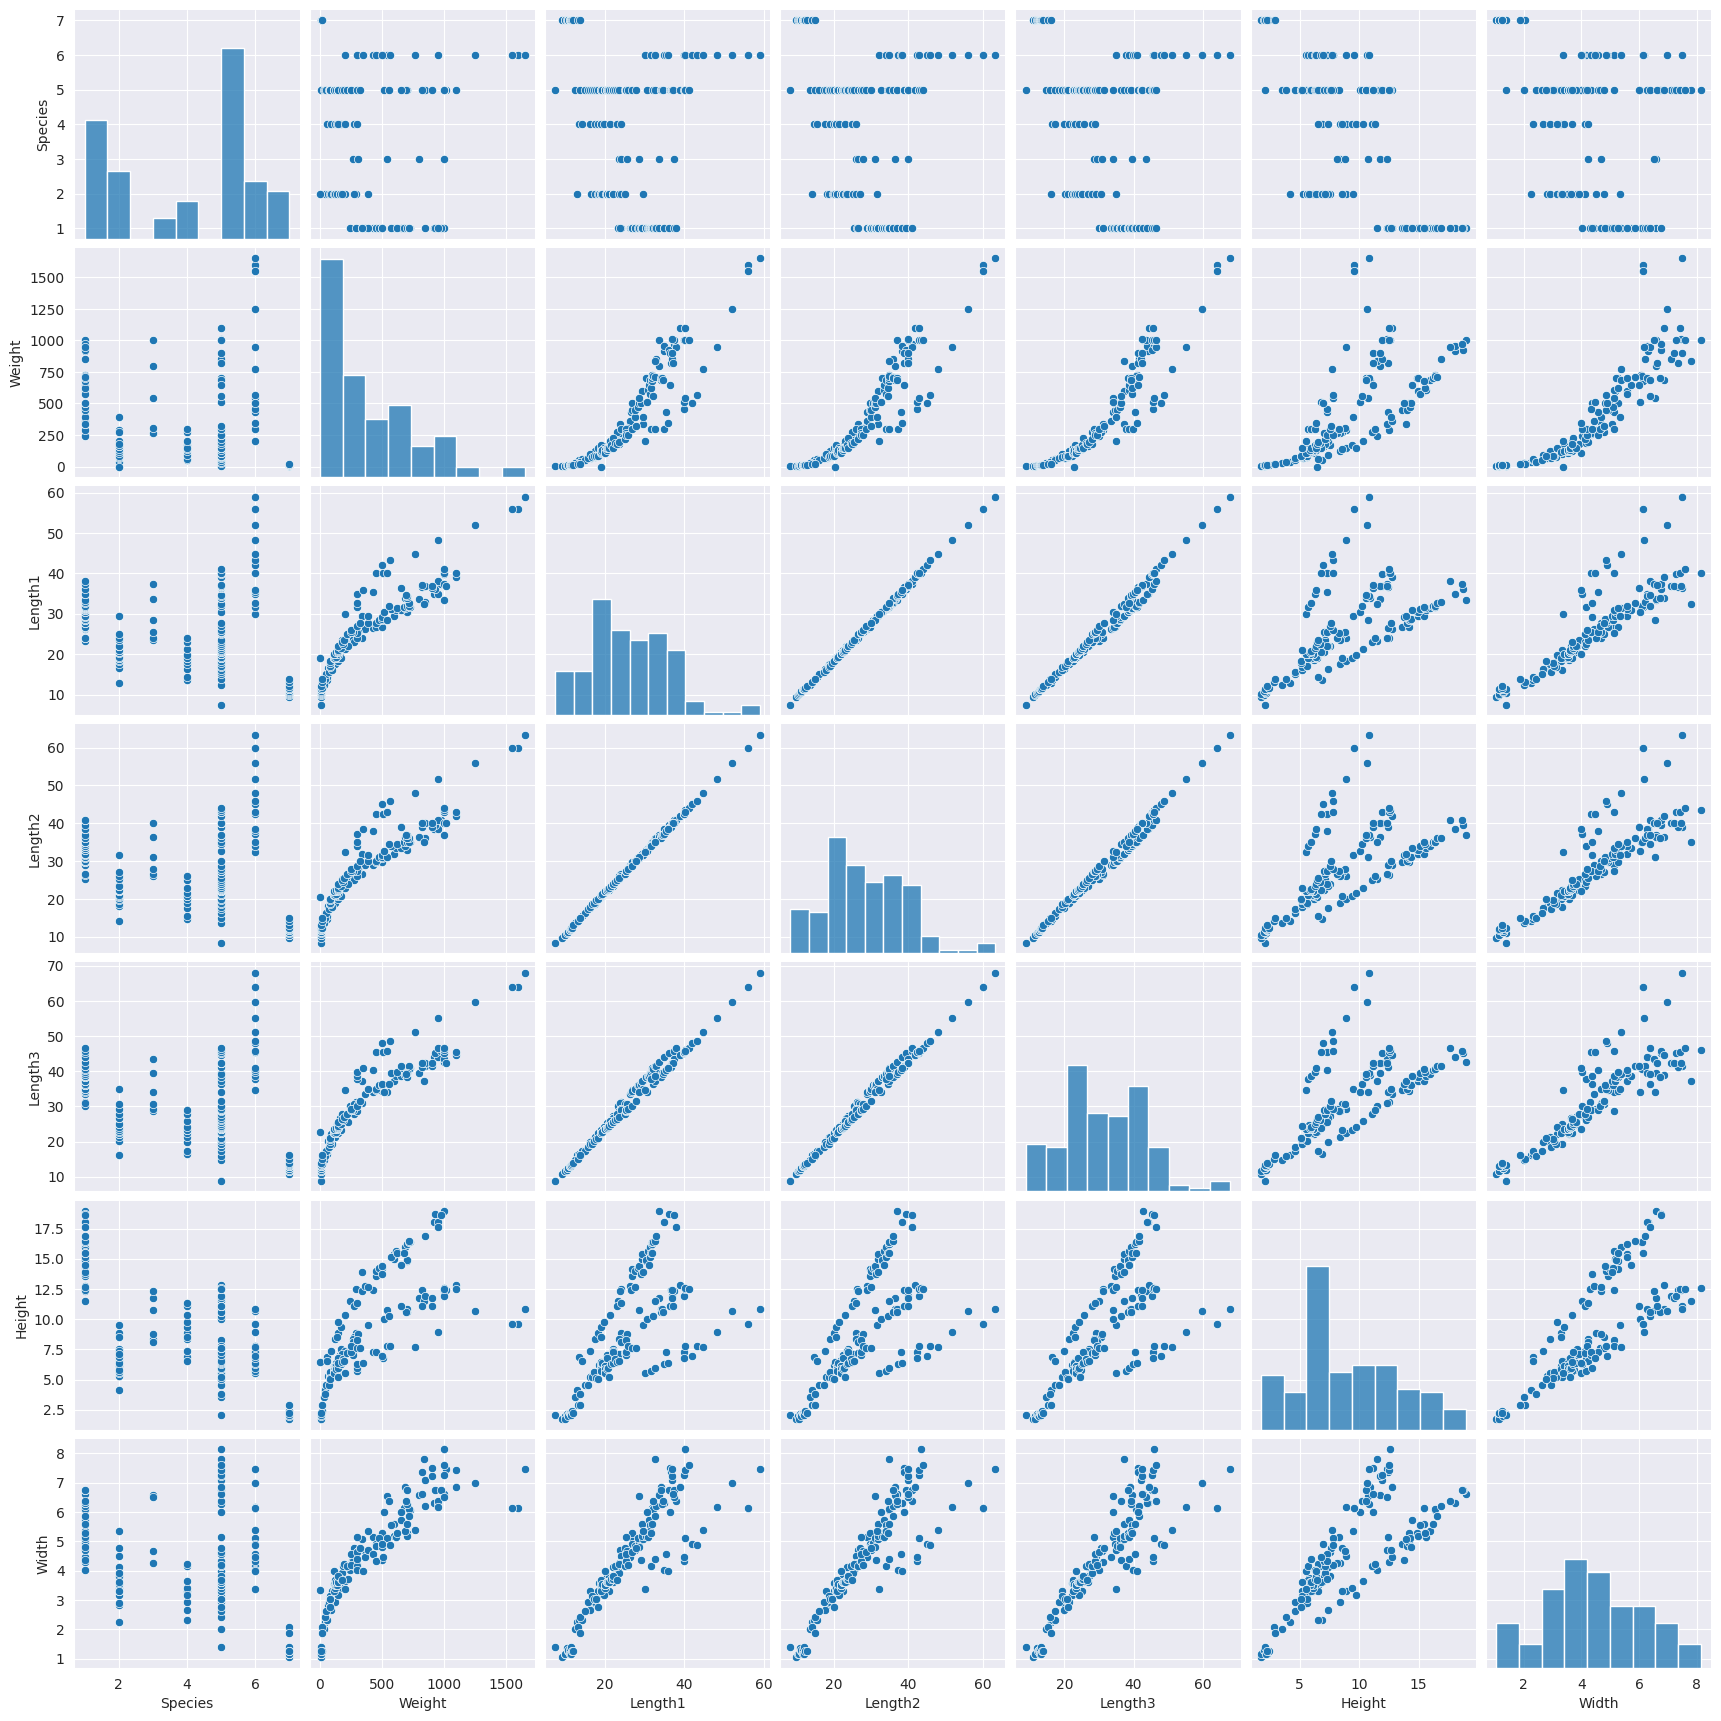

In [5]:
# Calculate means, Standarddeviations and outliers
means = data.mean()
stds = data.std()
outliers = data[(np.abs(data - means) > 2*stds).any(axis=1)]
print(means)
print(outliers)
print(stds)

# Visualize the dataset
sns.pairplot(data)
plt.show()

# Data opschonen en voorbereiden

In [6]:
# Search NaN and 0 values
print(data.isnull().sum())
print((data == 0).sum())

# Replace NaN and 0 values
data = data.replace(0, np.nan)
data = data.fillna(data.mean())



# Find outliers and remove them
means = data.mean()
stds = data.std()
outliers = data[(np.abs(data - means) > 2*stds).any(axis=1)]
print(outliers)
data = data.drop(outliers.index)


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64
Species    0
Weight     1
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64
     Species  Weight  Length1  Length2  Length3   Height   Width
29         1  1000.0     33.5     37.0     42.6  18.9570  6.6030
30         1   920.0     35.0     38.5     44.1  18.0369  6.3063
31         1   955.0     35.0     38.5     44.0  18.0840  6.2920
32         1   925.0     36.2     39.5     45.3  18.7542  6.7497
33         1   975.0     37.4     41.0     45.9  18.6354  6.7473
34         1   950.0     38.0     41.0     46.5  17.6235  6.3705
111        5   840.0     32.5     35.0     37.3  11.4884  7.7957
126        5  1000.0     40.2     43.5     46.0  12.6040  8.1420
140        6   950.0     48.3     51.7     55.1   8.9262  6.1712
141        6  1250.0     52.0     56.0     59.7  10.6863  6.9849
142        6  1600.0     56.0     60.0     64.0   9.6000  6.1440
143        6

In [7]:
display(data.head())

,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,430.0,26.5,29.0,34.0,12.4440,5.1340


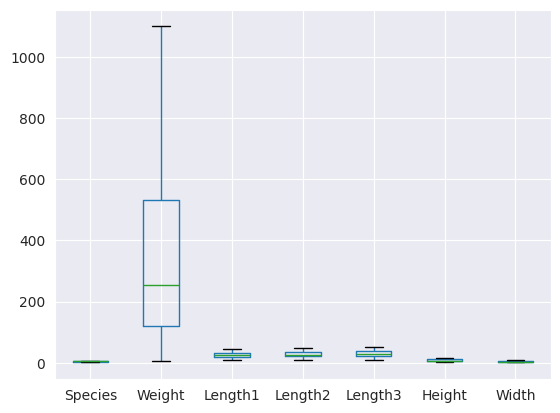

In [8]:
data.boxplot()
plt.show()

In [9]:
# Normalize the data (excluding the target 'Length1')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('Length1', axis=1))

# Data voorbereiden voor een eerlijke vergelijking

In [10]:
# Target
y = data['Length1'].astype(float)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Selecteer het linear regression model

In [11]:
# Select linear regression model
model = LinearRegression()


# Train en test het linear regression model

In [12]:
# Train the model
model.fit(X_train, y_train)

# Predict the target
y_pred = model.predict(X_test)

# Analyseer en evalueer het linear regression model

Mean Squared Error: 0.04871495542357118
R2 score: 0.9992574236551315


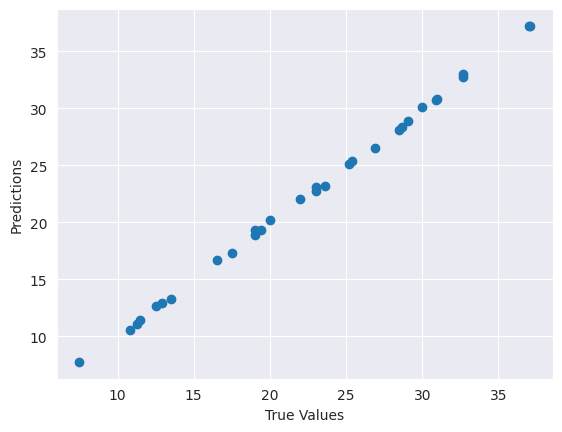

Train score: 0.999292460621132
Test score: 0.9992574236551315


In [13]:
# Analyse the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 score:', r2)

# Test the accuracy and precision of the model
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Check for over/underfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

# Selecteer het ridge regression model

**Note:** <br>
De alpha parameter is toegevoegd nadat we de beste alpha waarde hebben gevonden. De training score is hierdoor verslechterd, maar de test score is hierdoor verbeterd. Het model is dus minder gaan overfitten en is op nieuwe data accurater geworden.

In [14]:
# Select ridge regression model
model = Ridge(alpha=9.01)

# Train en test het ridge regression model

In [15]:
# Train the model
model.fit(X_train, y_train)

# Predict the target
y_pred = model.predict(X_test)

# Analyseer en evalueer het ridge regression model

Mean Squared Error: 0.26164240010125517
R2 score: 0.9960117082025324


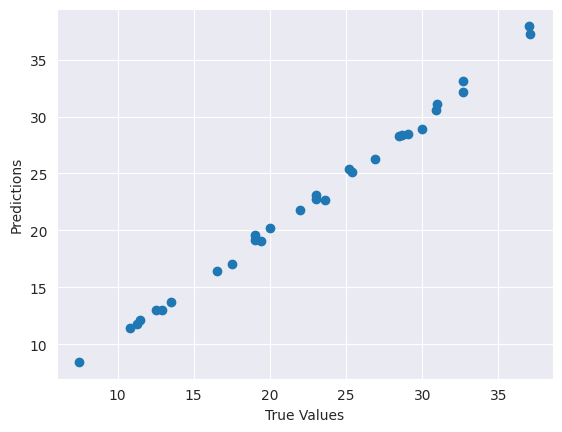

Train score: 0.9945397764381203
Test score: 0.9960117082025324


In [16]:
# Analyse the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 score:', r2)

# Test the accuracy and precision of the model
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Check for over/underfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

# Parameters testen voor ridge regression

In [17]:
# Try to find the best parameters for the ridge model
param_grid = {'alpha': np.arange(0, 10, 0.01)}
grid = GridSearchCV(Ridge(), param_grid, cv=5)
grid.fit(X_train, y_train)
print('Best alpha:', grid.best_params_)

Best alpha: {'alpha': np.float64(0.0)}


# Selecteer het random forest regression model

**Note:** <br>
Ik heb uitgezocht wat de optimale parameters zijn voor dit model. Hierdoor is de test en train score verbeterd.

In [18]:
# Select random forest model
model = RandomForestRegressor(n_estimators=28, max_depth=8)

# Train en test het random forest regression model

In [19]:
# Train the model
model.fit(X_train, y_train)

# Predict the target
y_pred = model.predict(X_test)

# Analyseer en evalueer het random forest regression model

Mean Squared Error: 0.49739819538926705
R2 score: 0.9924180135101249


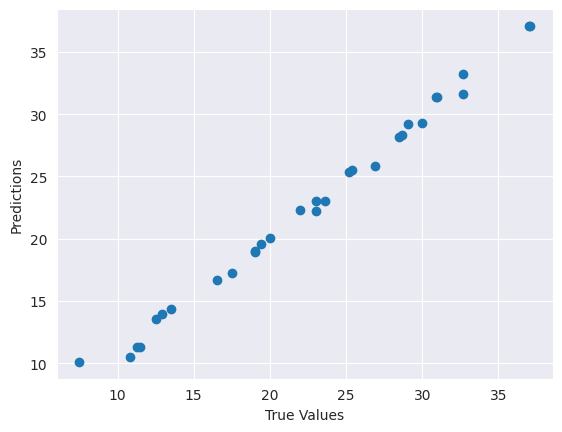

Train score: 0.9993463893370089
Test score: 0.9924180135101249


In [20]:
# Analyse the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 score:', r2)

# Test the accuracy and precision of the model
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Check for over/underfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

# Parameters testen voor random forest regression

In [21]:
# Try to find the best parameters for the random forest model
param_grid = {'n_estimators': np.arange(1, 100, 1), 'max_depth': np.arange(1, 10, 1)}
grid = RandomizedSearchCV(RandomForestRegressor(), param_grid, cv=5, random_state=42)
grid.fit(X_train, y_train)
print('Best parameters:', grid.best_params_)

Best parameters: {'n_estimators': np.int64(49), 'max_depth': np.int64(9)}


# Vergelijking van de modellen

| Model         | Train Score            | Test Score             |
|---------------|------------------------|------------------------|
| Linear        | 0.9279913563773429     | 0.8836738228176422     |
| Ridge         | 0.9269419621370772     | 0.8848540020613204     |
| Random Forest | 0.975885316260865      | 0.8870660777203551     |

Het Random Forest model is het meeste geoverfit, terwijl de test score maar marginaal beter is dan de andere twee modellen. Ridge heeft een net iets betere test score dan linear, terwijl de overfitting bij ridge iets minder is. Voor deze dataset zouden wij daarom het ridge model kiezen.

# Conclusie
Door middel van het Ridge regressie model kunnen wij met 88.48% zekerheid de petal length voorspellen op basis van de andere data in de dataset.